In [1]:
import numpy as np
import matplotlib.pyplot as plt
import resfuncRead as rfr
import pandas as pd
from scipy.stats import norm
import matplotlib.mlab as mlab
plt.rcParams.update({'font.size': 30})

In [2]:
Y = 0.22
Er = 4
eps = 0.0038
sigx_D = 0.022

Neh = []
Nee = []
F = 0.1
Ner = Er*Y/eps
Nnr = (Y*Er)/eps
sig_er = np.sqrt(Ner*F)
sig_nr = Nnr*(sigx_D/Y)
i = 0

for i in np.arange(0,10000):
    
    Fnr = np.random.normal(0,sig_nr)
    N = Nnr + Fnr
    Neh.append(N)
    
    Fer = np.random.normal(0,sig_er) 
    N_er = Ner + Fer
    Nee.append(N_er)
    


print(sig_er)
print(sig_nr)
print(sigx_D/Y)

4.812265031857878
23.157894736842103
0.09999999999999999


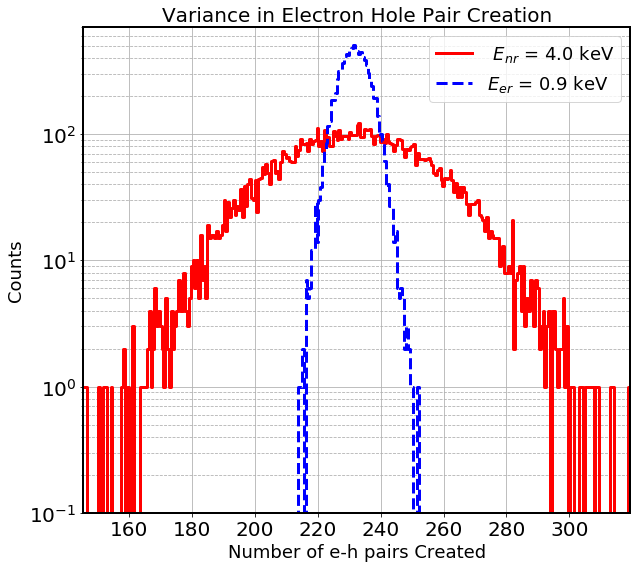

In [3]:

xmin=min(Neh)
xmax=max(Neh)
amax= 30
#print(np.std(val_stat))
#print(xmin,xmax)

n_res,n_resx = np.histogram(Neh,300,range=(xmin,xmax))
xresc = (n_resx[:-1] + n_resx[1:]) / 2

n_res1,n_resx1 = np.histogram(Nee,300,range=(xmin,xmax))
xresc1 = (n_resx1[:-1] + n_resx1[1:]) / 2

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(-amax,amax,0.01)
label1 = ' $E_{{nr}}$ = {0:2.1f} keV'.format(Er)
label2 = '$E_{{er}}$ = {0:2.1f} keV'.format(Er*Y) 
step, = ax1.step(xresc,n_res, where='mid',color='r', linestyle='-', label= label1, linewidth=3)
step, = ax1.step(xresc1,n_res1, where='mid',color='b', linestyle='--', label= label2, linewidth=3)
ymin=0.1
ymax=max(n_res)


ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) #in pairs
ax1.set_ylim(ymin,700)
ax1.set_xlabel('Number of e-h pairs Created',size = '18')
ax1.set_ylabel('Counts',size = '18')
ax1.set_title("Variance in Electron Hole Pair Creation",size ='20')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
ax1.tick_params(axis='both', labelsize = '20')

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Var_eh.png')
plt.show()